<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,25.173264,60.235122,-1493.513721,-1398.105335,79.721499,-1477.826834
1,0.0,1.0,60.573066,41.060974,-974.239452,-862.605412,-332.774612,-529.830800
2,0.0,2.0,49.811381,33.242587,-379.225883,-286.171915,265.083169,-551.255084
3,0.0,3.0,45.479777,21.613988,-196.146286,-119.052521,799.348156,-918.400678
4,0.0,4.0,46.475315,42.905311,-615.777458,-516.396831,31.999461,-548.396292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,26.987991,89.791458,2.567214,129.346663,-556.987255,686.333919
29996,999.0,26.0,47.988287,56.623650,-2576.951261,-2462.339325,-224.264921,-2238.074404
29997,999.0,27.0,61.904127,70.646858,-1794.387768,-1651.836783,-268.439584,-1383.397200
29998,999.0,28.0,24.762205,22.269353,-117.804283,-60.772725,-70.048429,9.275704


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    25.173264  60.235122 -1493.513721 -1398.105335   79.721499   
      1.0    60.573066  41.060974  -974.239452  -862.605412 -332.774612   
      2.0    49.811381  33.242587  -379.225883  -286.171915  265.083169   
      3.0    45.479777  21.613988  -196.146286  -119.052521  799.348156   
      4.0    46.475315  42.905311  -615.777458  -516.396831   31.999461   
...                ...        ...          ...          ...         ...   
999.0 25.0   26.987991  89.791458     2.567214   129.346663 -556.987255   
      26.0   47.988287  56.623650 -2576.951261 -2462.339325 -224.264921   
      27.0   61.904127  70.646858 -1794.387768 -1651.836783 -268.439584   
      28.0   24.762205  22.269353  -117.804283   -60.772725  -70.048429   
      29.0   54.120207  36.393072  -241.397934  -140.884655  -49.589148   

                   e_hat  
rep   index               
0.0   0.0   -1477.826834  
      1.0    -529.830800  
      2.0    -551.255084  
      3.0    -918.400678  
      4.0    -548.396292  
...                  ...  
999.0 25.0    686.333919  
      26.0  -2238.074404  
      27.0  -1383.397200  
      28.0      9.275704  
      29.0    -91.295507  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    25.173264  60.235122 -1493.513721 -1398.105335   79.721499   
      1.0    60.573066  41.060974  -974.239452  -862.605412 -332.774612   
      2.0    49.811381  33.242587  -379.225883  -286.171915  265.083169   
      3.0    45.479777  21.613988  -196.146286  -119.052521  799.348156   
      4.0    46.475315  42.905311  -615.777458  -516.396831   31.999461   
...                ...        ...          ...          ...         ...   
999.0 25.0   26.987991  89.791458     2.567214   129.346663 -556.987255   
      26.0   47.988287  56.623650 -2576.951261 -2462.339325 -224.264921   
      27.0   61.904127  70.646858 -1794.387768 -1651.836783 -268.439584   
      28.0   24.762205  22.269353  -117.804283   -60.772725  -70.048429   
      29.0   54.120207  36.393072  -241.397934  -140.884655  -49.589148   

                   e_hat  
rep   index               
0.0   0.0   -1477.826834  
      1.0    -529.830800  
      2.0    -551.255084  
      3.0    -918.400678  
      4.0    -548.396292  
...                  ...  
999.0 25.0    686.333919  
      26.0  -2238.074404  
      27.0  -1383.397200  
      28.0      9.275704  
      29.0    -91.295507  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,25.173264,60.235122,-1493.513721,-1398.105335,79.721499,-1477.826834
1,0.0,1.0,60.573066,41.060974,-974.239452,-862.605412,-332.774612,-529.830800
2,0.0,2.0,49.811381,33.242587,-379.225883,-286.171915,265.083169,-551.255084
3,0.0,3.0,45.479777,21.613988,-196.146286,-119.052521,799.348156,-918.400678
4,0.0,4.0,46.475315,42.905311,-615.777458,-516.396831,31.999461,-548.396292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,26.987991,89.791458,2.567214,129.346663,-556.987255,686.333919
29996,999.0,26.0,47.988287,56.623650,-2576.951261,-2462.339325,-224.264921,-2238.074404
29997,999.0,27.0,61.904127,70.646858,-1794.387768,-1651.836783,-268.439584,-1383.397200
29998,999.0,28.0,24.762205,22.269353,-117.804283,-60.772725,-70.048429,9.275704


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    25.173264  60.235122 -1493.513721 -1398.105335   79.721499   
      1.0    60.573066  41.060974  -974.239452  -862.605412 -332.774612   
      2.0    49.811381  33.242587  -379.225883  -286.171915  265.083169   
      3.0    45.479777  21.613988  -196.146286  -119.052521  799.348156   
      4.0    46.475315  42.905311  -615.777458  -516.396831   31.999461   
...                ...        ...          ...          ...         ...   
999.0 25.0   26.987991  89.791458     2.567214   129.346663 -556.987255   
      26.0   47.988287  56.623650 -2576.951261 -2462.339325 -224.264921   
      27.0   61.904127  70.646858 -1794.387768 -1651.836783 -268.439584   
      28.0   24.762205  22.269353  -117.804283   -60.772725  -70.048429   
      29.0   54.120207  36.393072  -241.397934  -140.884655  -49.589148   

                   e_hat  
rep   index               
0.0   0.0   -1477.826834  
      1.0    -529.830800  
      2.0    -551.255084  
      3.0    -918.400678  
      4.0    -548.396292  
...                  ...  
999.0 25.0    686.333919  
      26.0  -2238.074404  
      27.0  -1383.397200  
      28.0      9.275704  
      29.0    -91.295507  

[30000 rows x 6 columns]

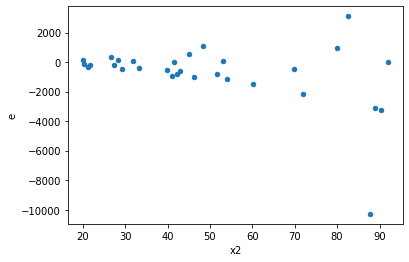

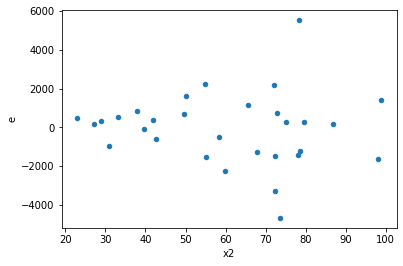

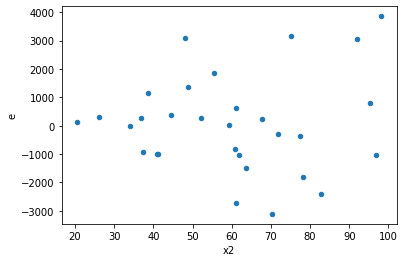

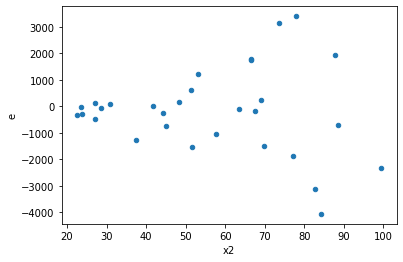

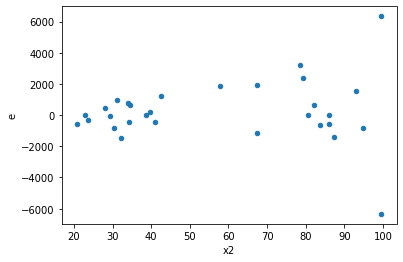

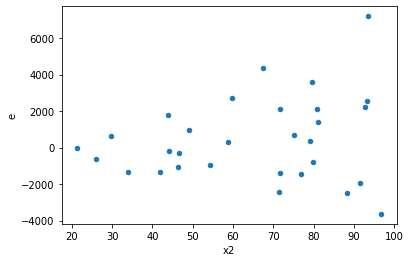

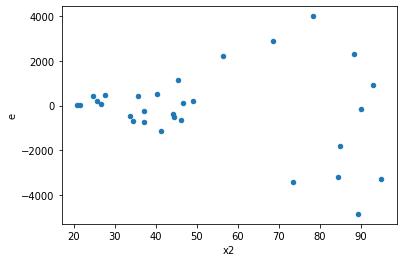

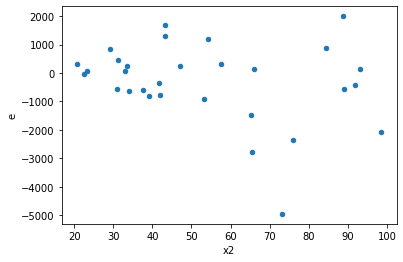

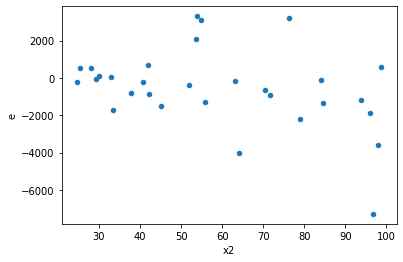

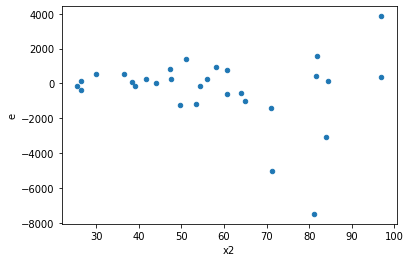

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,11.0,5386455.580505241,65472615.3757998,359097.0387003494,5952055.943254527,16.575062731779457,3.944225587937389e-05,0.9999802788720603,1.9721127939686944e-05,Reject005=0 : Heteroscedasticity
6.0,18.0,8.0,26927549.81252647,34706241.37150669,1495974.9895848038,4338280.171438336,2.8999683829222254,0.12782606607934133,0.9360869669603293,0.06391303303967066,Reject005=1 : Homoscedasticity
7.0,16.0,10.0,7628510.459415812,41139066.536354326,476781.90371348825,4113906.6536354325,8.628487410267978,0.0014875062091768143,0.9992562468954116,0.0007437531045884072,Reject005=0 : Heteroscedasticity
8.0,20.0,6.0,60930894.01367823,36165571.74649318,3046544.7006839113,6027595.291082197,1.9785021666444207,0.4060859206687062,0.7969570396656469,0.2030429603343531,Reject005=1 : Homoscedasticity
11.0,10.0,16.0,6827540.301368691,120791302.65514293,682754.030136869,7549456.415946433,11.057358994179827,4.011622484600963e-05,0.999979941887577,2.0058112423004815e-05,Reject005=0 : Heteroscedasticity
12.0,11.0,15.0,5104597.559124193,95251682.80325603,464054.32355674484,6350112.1868837355,13.68398453485638,1.3553251462905536e-05,0.9999932233742685,6.776625731452768e-06,Reject005=0 : Heteroscedasticity
13.0,15.0,11.0,15818669.534083497,40986404.506890774,1054577.9689388997,3726036.7733537066,3.5332017955038335,0.04034581001700843,0.9798270949914958,0.020172905008504216,Reject005=0 : Heteroscedasticity
14.0,16.0,10.0,35731844.612032495,46466812.66834165,2233240.288252031,4646681.266834165,2.0806902379820253,0.24190778003481195,0.879046109982594,0.12095389001740597,Reject005=1 : Homoscedasticity
16.0,11.0,15.0,16943710.682197418,62279171.570093915,1540337.33474522,4151944.7713395944,2.6954775929172348,0.07659196270636426,0.9617040186468179,0.03829598135318213,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,11.0,5386455.580505241,65472615.3757998,359097.0387003494,5952055.943254527,16.575062731779457,3.944225587937389e-05,Reject005=0 : Heteroscedasticity
1.0,15.0,11.0,76962980.1199338,13926834.089169506,5130865.34132892,1266075.826288137,0.24675678312777877,0.013675053102131782,Reject005=0 : Heteroscedasticity
2.0,19.0,7.0,59065574.44872951,18284720.839188397,3108714.444669974,2612102.977026914,0.8402518222622466,0.7089097457951761,Reject005=1 : Homoscedasticity
3.0,15.0,11.0,31739556.145044483,17564058.264425956,2115970.409669632,1596732.5694932686,0.7546100655266571,0.6004606559450145,Reject005=1 : Homoscedasticity
4.0,16.0,10.0,51173161.04546646,25004881.002217345,3198322.565341654,2500488.1002217345,0.7818123560512807,0.6375187889582096,Reject005=1 : Homoscedasticity
5.0,16.0,10.0,130642202.31761526,15893049.292579787,8165137.6448509535,1589304.9292579787,0.19464520971795446,0.003900169261892306,Reject005=0 : Heteroscedasticity
6.0,18.0,8.0,26927549.81252647,34706241.37150669,1495974.9895848038,4338280.171438336,2.8999683829222254,0.12782606607934133,Reject005=1 : Homoscedasticity
7.0,16.0,10.0,7628510.459415812,41139066.536354326,476781.90371348825,4113906.6536354325,8.628487410267978,0.0014875062091768143,Reject005=0 : Heteroscedasticity
8.0,20.0,6.0,60930894.01367823,36165571.74649318,3046544.7006839113,6027595.291082197,1.9785021666444207,0.4060859206687062,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    588
Reject005=1 : Homoscedasticity      412
Name: Result_test, dtype: int64